# Lending Club Case Study Notebook

## Introduction

### Goal
Understand how data can be leveraged to reduce the risk of financial loss when lending to customers.

### Problem
This company stands as the largest **online loan marketplace, facilitating personal, business, and medical procedure loans**. Through a swift online platform, borrowers can secure loans at lower interest rates. However, like other lending companies, lending to **‘risky’** customers is the primary contributor to financial losses, known as credit loss. **Credit loss** occurs when a borrower fails to repay, causing a financial deficit for the lender. Essentially, borrowers who default lead to the most significant losses. In this scenario, customers marked as 'charged-off' are classified as 'defaulters'.

### Target
Minimize credit loss by utilizing EDA techniques to identify key factors contributing to loan defaults.

### Risk associated with the problem
- If an applicant is likely to repay the loan but their application is rejected, this results in lost business (declining loans for non-defaulters).
- If an applicant is unlikely to repay the loan but their application is approved, this can lead to a financial deficit (approving loans for defaulters).

The dataset provided contains historical loan data, with each entry representing details of individual loan applicants.


In [2]:
# Analysis Workflow

# 1. Understanding the Data
# - Load and inspect the dataset.

# 2. Data Preparation and Cleaning
# - Clean the dataset by handling missing values and duplicates.

# 3. Data Exploration and Visualization
# - Explore the data using visualizations to uncover patterns and insights.

# 4. Final Observations and Insights
# - Summarize key findings and conclusions from the analysis.


### Loading Libraries and Data

In [4]:
# Importing Libraries for Data Manipulation
import pandas as pd  # DataFrame manipulation
import numpy as np   # Numerical operations

# Importing Libraries for Data Visualization
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Basic plotting
import plotly.express as px  # Interactive plotting

# Warnings Library
import warnings  # Library to handle warnings
warnings.filterwarnings('ignore')  # Ignore warnings




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# Loading Data
# Load loan data from a CSV file
loan_data = pd.read_csv('loan.csv')

# Load the data dictionary from an Excel file
loan_dd = pd.read_excel('Data_Dictionary.xlsx')


In [134]:

# # Parsing 'issue_d' column to extract 'issue_year'
# loan_data['issue_year'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y').dt.year
# print("Created 'issue_year' from 'issue_d'")


### Setting Dataframe display options

In [8]:
# Removing Display Limits for DataFrame (optional)
pd.set_option('display.max_rows', 100)  # Set maximum rows to display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust display width automatically

# Setting Style for Seaborn
sns.set_palette("cubehelix", 8)  # Set color palette
sns.set_style("whitegrid", {'axes.grid': False})  # Set style and disable grid lines


### Printing the first 5 rows of the dataframe and data dictionary

In [10]:
# Printing the data dictionary(first 5 rows)
loan_dd.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [11]:
# Printing the data(first 5 rows)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

### Basic information about the data

In [13]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Number of Columns: 112
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416805
Number of duplicates: 0


In [14]:
# Basic infomation about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 112 entries, id to issue_year
dtypes: float64(74), int32(1), int64(13), object(24)
memory usage: 33.8+ MB
None


In [15]:
# Data types of each column
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
issue_year                      int32
Length: 112, dtype: object


In [16]:
# Describing the dataframe
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [17]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'issue_year'],
      dtype='object', length=112)


### Cleaning the large null value columns and rows

In [19]:
## Checking for missing values
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
issue_year                        0
Length: 112, dtype: int64


In [20]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

mort_acc                 100.0
dti_joint                100.0
total_rev_hi_lim         100.0
mo_sin_rcnt_tl           100.0
mo_sin_rcnt_rev_tl_op    100.0
                         ...  
revol_bal                  0.0
pub_rec                    0.0
open_acc                   0.0
inq_last_6mths             0.0
issue_year                 0.0
Length: 112, dtype: float64


In [21]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 55)


In [22]:
# Checking columns again for null value percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
policy_code                    0.00
total_acc                      0.00
initial_list_status            0.00
out_prncp                      0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
application_type               0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
revol_bal                      0.00
last_pymnt_amnt                0.00
delinq_amnt                    0.00
acc_now_delinq              

We have removed the column which contain more than 50% missing values which will reduce impact on analyis and imporve the accuracy of the analysis.

In [24]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'issue_year'],
      dtype='object')


In [25]:
# Checking for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


As the max number of missing value in row is very low compared to the count of columns(54 after removing irrelevant columns), we can move ahead with process as the impact is insignificant.

### Removing the irrelevant columns

In [28]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_data=loan_data.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_data=loan_data.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 27)


Removed the above columns as they are customer behavior variables and are not available at time of decision and hence not useful for analysis.

In [30]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_data.nunique().sort_values(ascending=True))

delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
tax_liens                         1
term                              2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
issue_year                        5
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


As there are many columns with 1 unique value and null values, we have removed them as they are not relevant to the analysis.

In [32]:
# Removing irrelevant columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 19)


In [33]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year'],
      dtype='object')


As we are done removing the irrelevant columns, we can move ahead with the analysis and check for null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

### Removing and fixing the null values

In [36]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
id                         0
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
home_ownership             0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
issue_year                 0
dtype: int64


| **Column name** | **Count of Null values** |
|---|---|
|  emp_length | 1075  |
|  pub_rec_bankruptcies | 697  |

The above columns has null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [38]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [39]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


As for column 'emp_length', we can remove the null values as fixing null values are not feasible and will lead to loss of information.

In [41]:
# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_data.shape)

(38642, 19)


As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [43]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [44]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
issue_year              0
dtype: int64


We are done with fixing and removing null values to improve the accuracy of the analysis.

In [46]:
# Shape of the dataframe
print(loan_data.shape)

(38642, 19)


### Removing duplicate rows from the dataframe

In [48]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

# No duplicate rows found in the dataframe

(38642, 19)


### Correcting Data Types and Deriving New Columns

In [50]:
# Checking information about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [51]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [52]:
# Setting decimal point limit for all data 
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)
      
loan_data.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
4        B5         1.0           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
4 2011-12-01      Current           other         OR  17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
4                   0.0        2011           12

As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [54]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 20)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

In [56]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37544, 17)

In [57]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers

In [148]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement

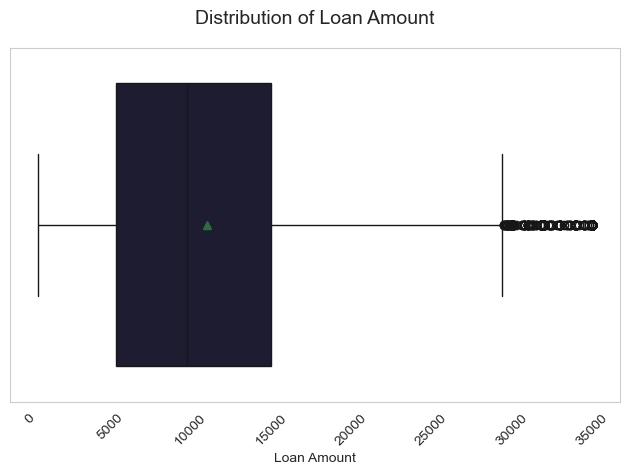

In [159]:
sns.boxplot(
    x="loan_amnt",
    showmeans=True,
    data=loan_data
)

plt.suptitle('Distribution of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

In [142]:
## starting with int_rate
## using plotly for interactive interaction and value retrival from chart for upper fence.
#px.box(loan_data,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

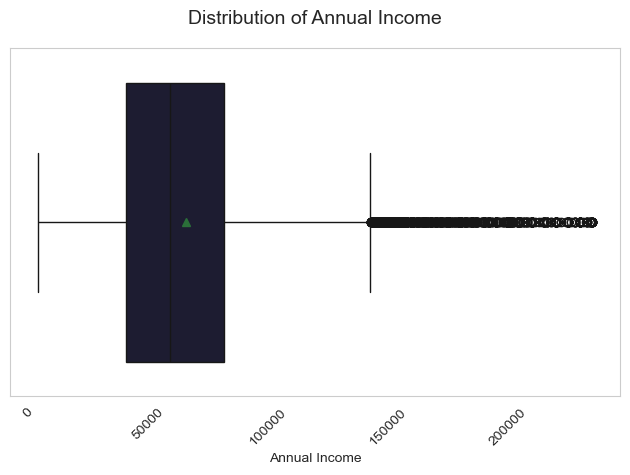

In [152]:
sns.boxplot(
    x="annual_inc",
    showmeans=True,
    data=loan_data,
)

# Customize the title and x-axis label
plt.suptitle('Distribution of Annual Income', fontsize=14)
plt.xlabel('Annual Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

## Annual income has a large range, from $4,000 to $6,000,000, which seems like an extreme outlier. The median income is $59,000.
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.


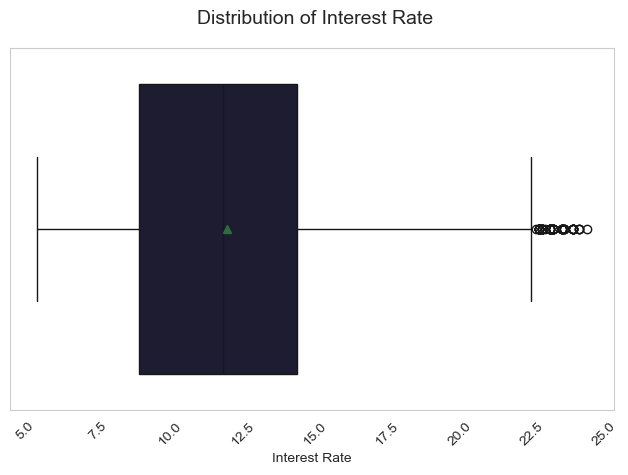

In [150]:
sns.boxplot(
    x="int_rate",
    showmeans=True,
    data=loan_data,
)

plt.suptitle('Distribution of Interest Rate', fontsize=14)
plt.xlabel('Interest Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

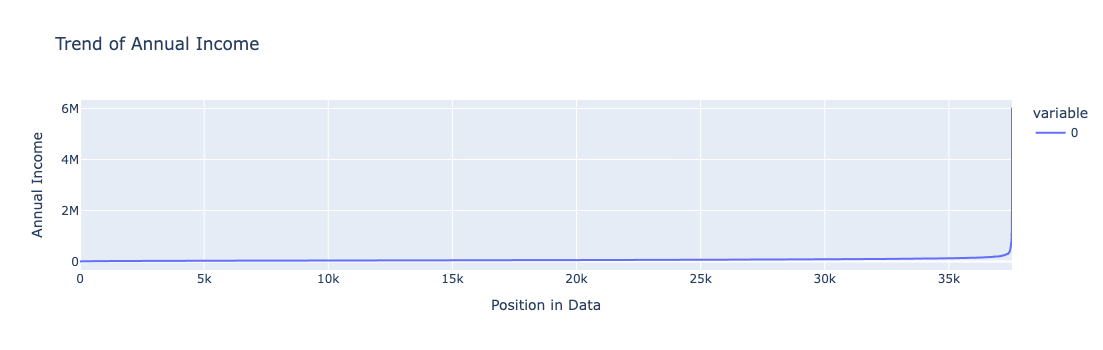

In [63]:


## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [65]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

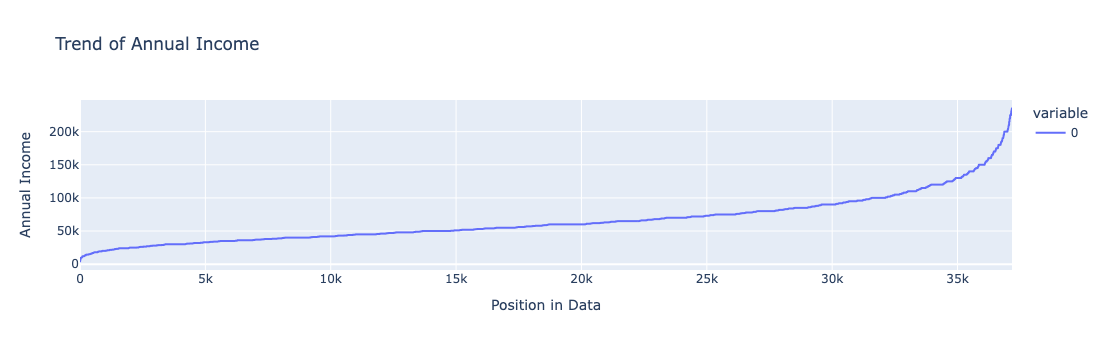

In [154]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As the trend is more compatible with the analysis, we can proceed with analysis of column 'dti'.

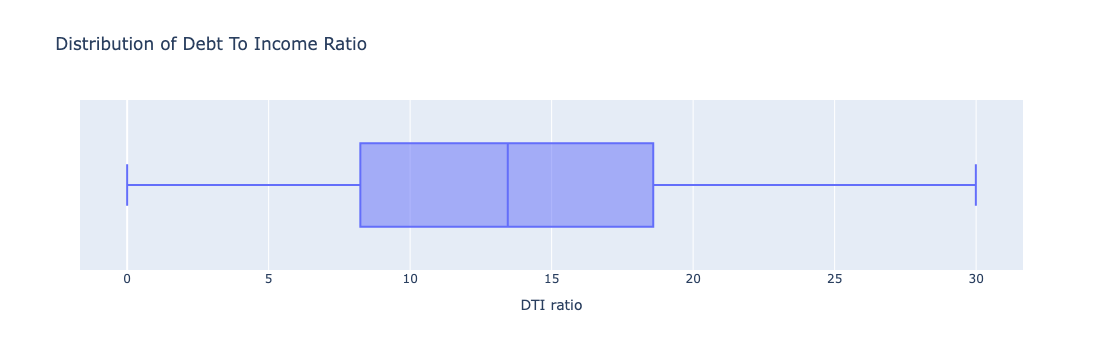

In [156]:
## starting with dti
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(loan_data,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

The data has been cleaned and outliers removed, we can move ahead with the analysis.

### Univariate Analysis

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


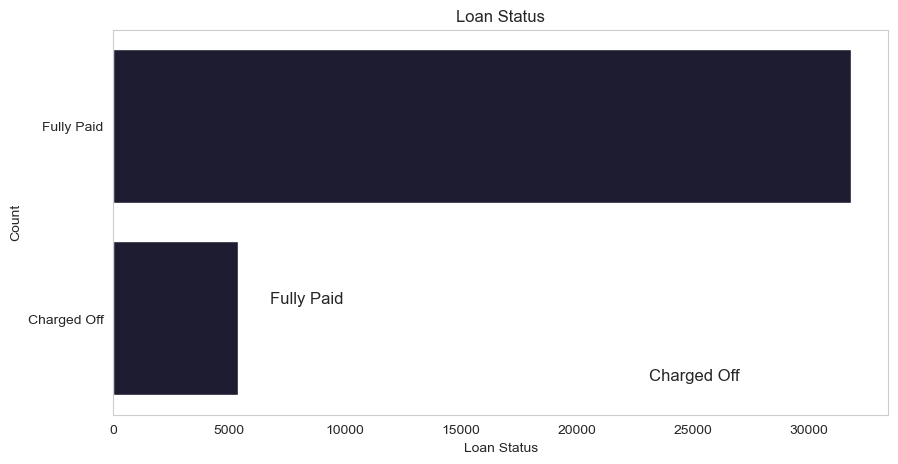

In [71]:
# Loan status 
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

**Inference:** Defaulted loan are low in numbers compared to Fully Paid.

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


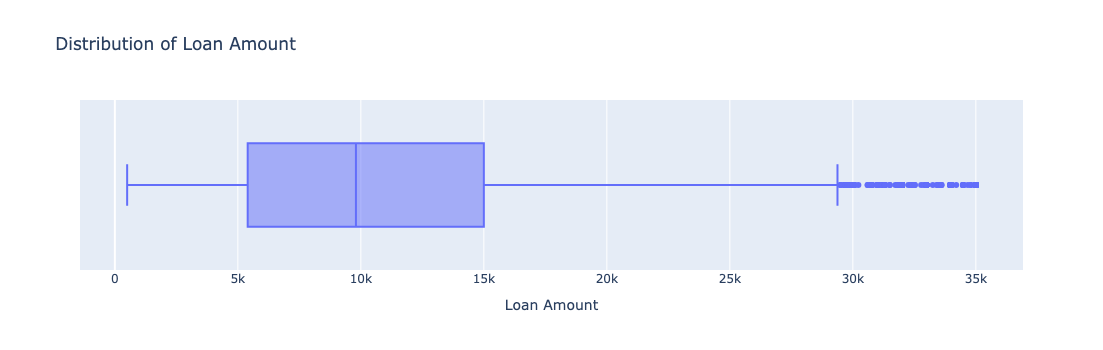

In [73]:
# Loan Amount
print(loan_data.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

**Inference**: The loan amount varies from 500 to 35000 with a mean of 9800.

In [ ]:
# Term of loan 
print(loan_data.term.value_counts()*100/loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

**Inference**: More than half of the loan taken has term of 36 months compared to 60 months.

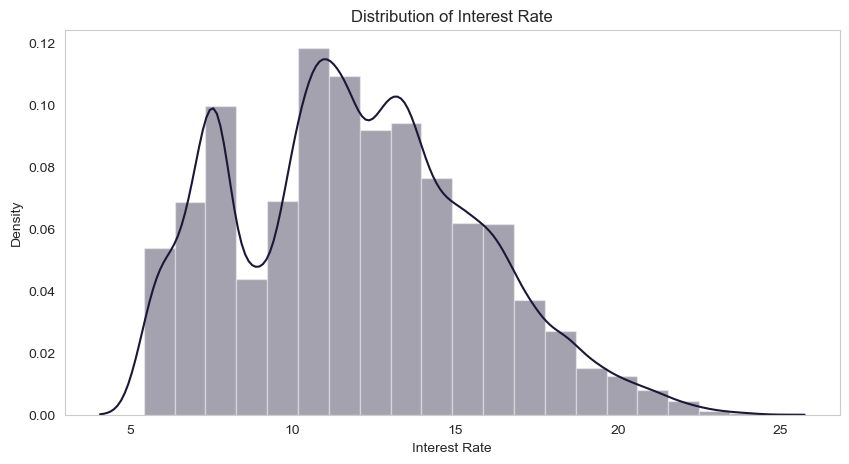

In [77]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Inference**: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

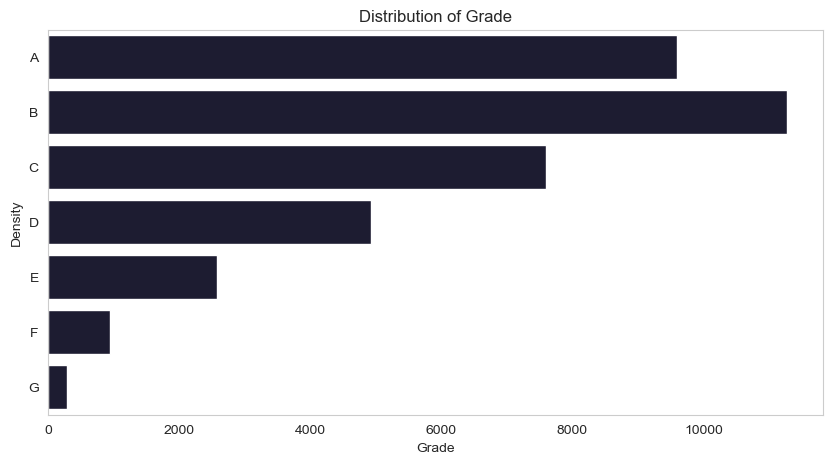

In [162]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Inference**: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

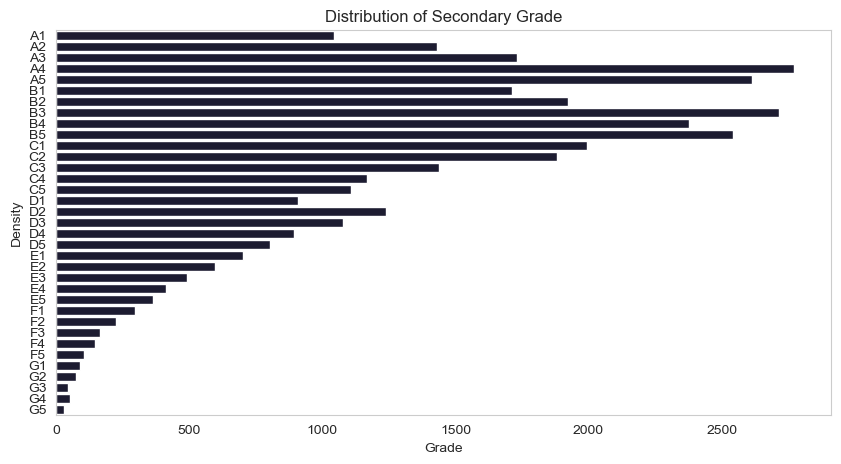

In [81]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

**Inference**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

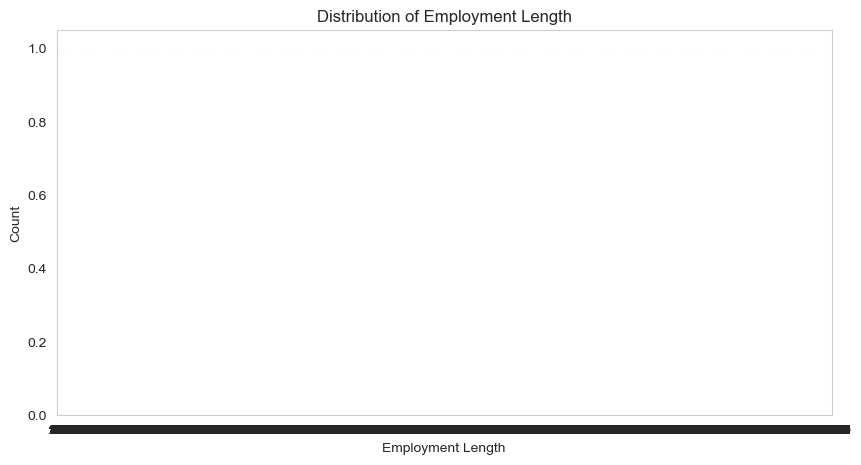

In [83]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers have working experience greater than 10 years.

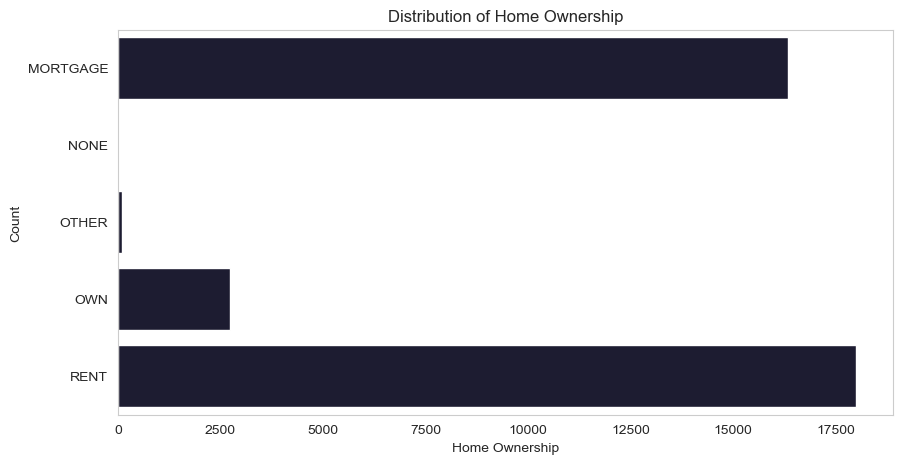

In [85]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers don't posses property and are on mortage or rent.

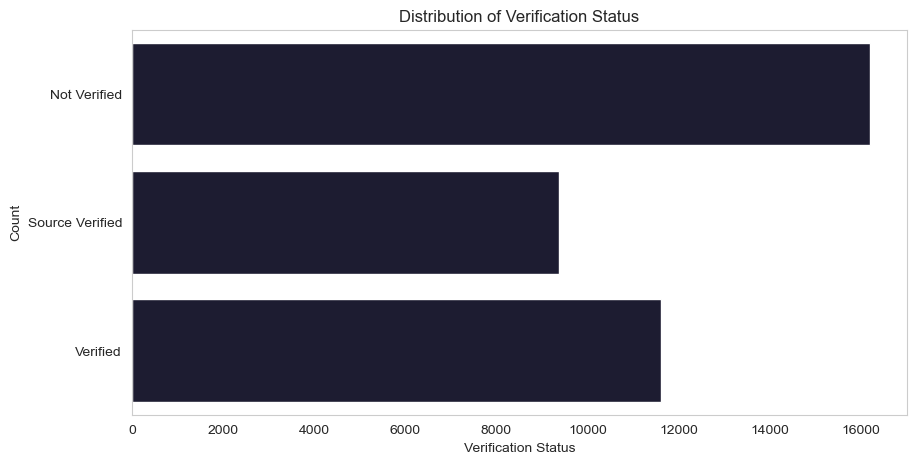

In [87]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

**Inference**: About 50% of the borrowers are verified by the company or have source verified.

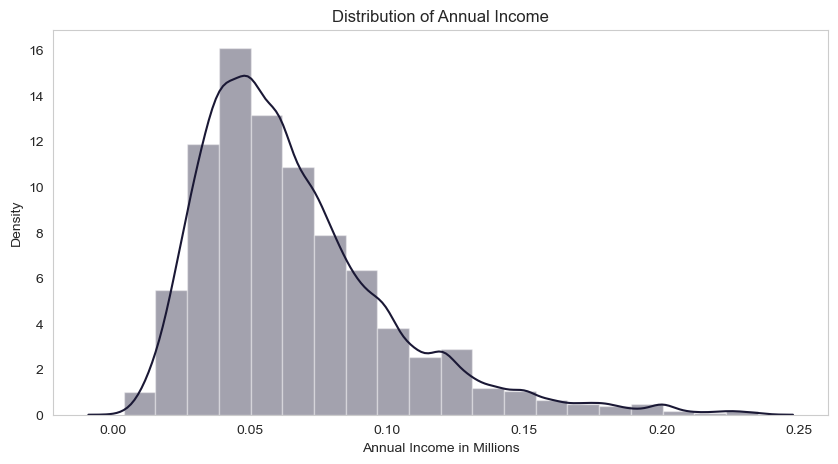

In [89]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

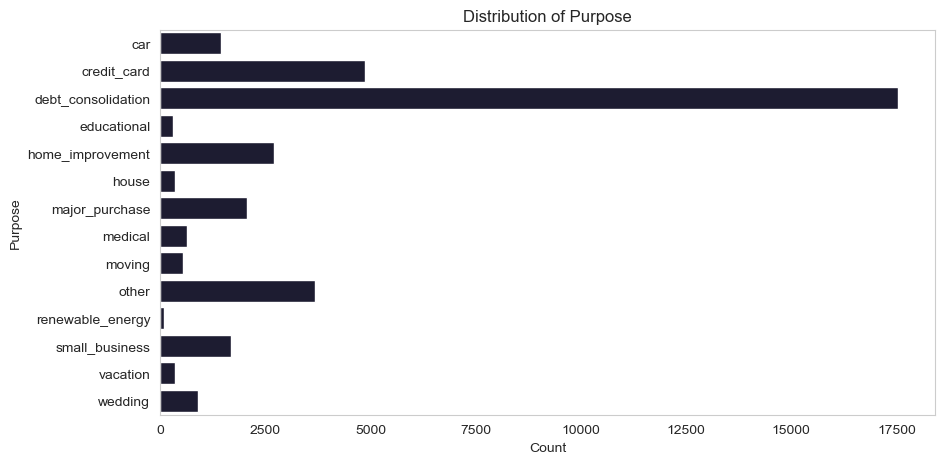

In [91]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

**Inference**: A large percentage of loans are taken for debt consolidation followed by credit card.

In [93]:
# # Distribution of addr_state
# plt.figure(figsize=(15,5))
# sns.countplot(loan_data.addr_state,hue=loan_data.loan_status)
# plt.xlabel('Count')
# plt.ylabel('State')
# plt.title('Distribution of State',fontsize=12)
# plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

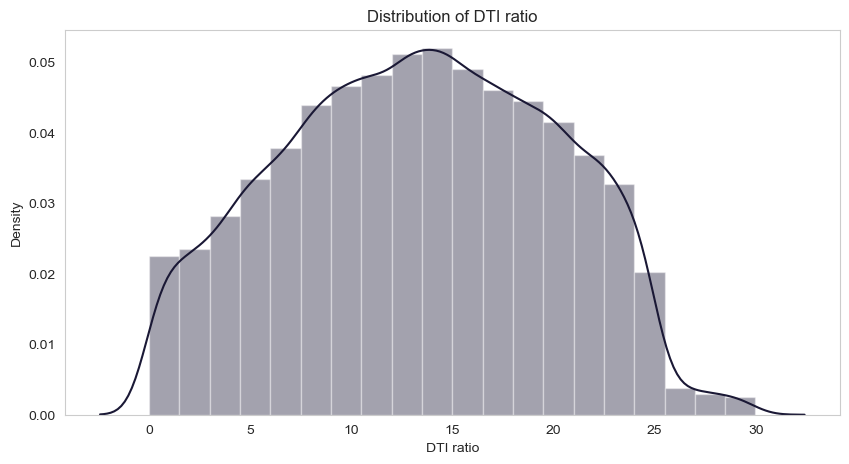

In [95]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

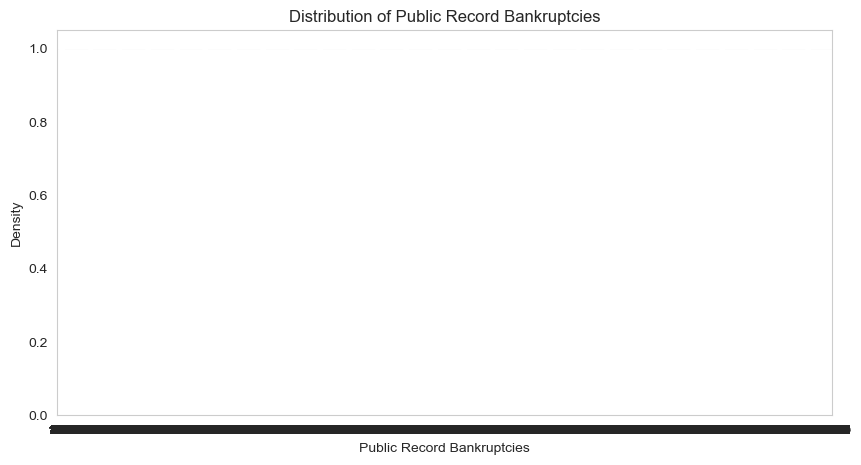

In [97]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

In [132]:
# Distribution of issue_month
# plt.figure(figsize=(10,5))
# sns.countplot(loan_data.issue_month,hue=loan_data.loan_status)
# plt.xlabel('Issue Month')
# plt.ylabel('Density')
# plt.title('Distribution of Loan Issue Month',fontsize=12)
# plt.show()

**Inference**: Majority of the loans are given in last quarter of the year.

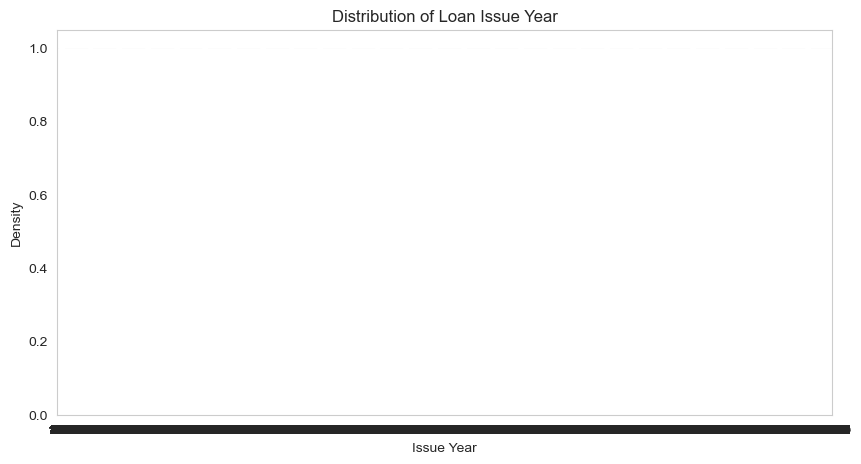

In [107]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

**Inference**: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis

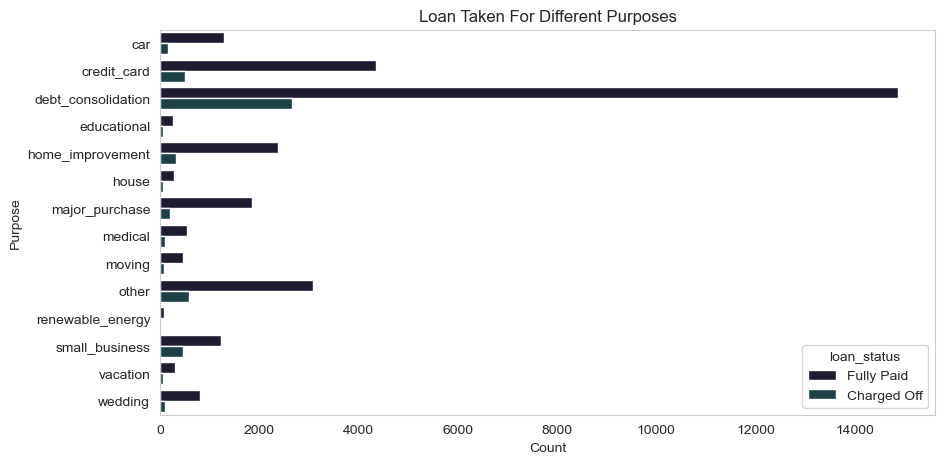

In [108]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

**Inference:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

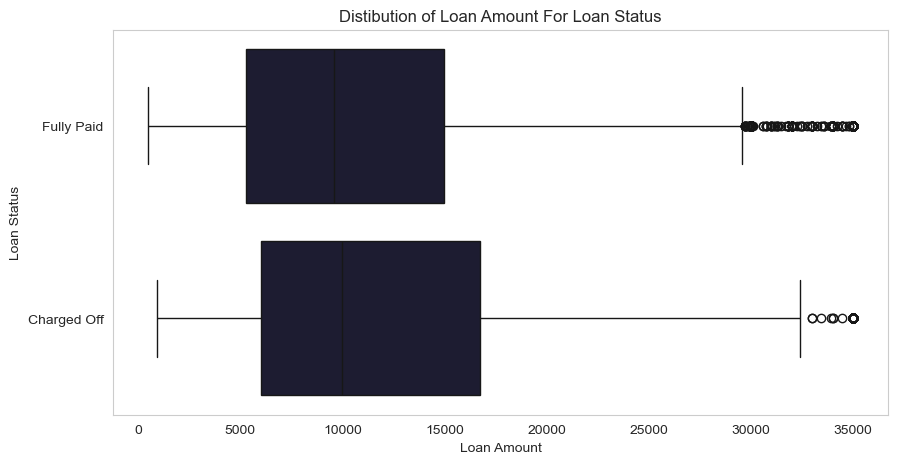

In [103]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

**Inference:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

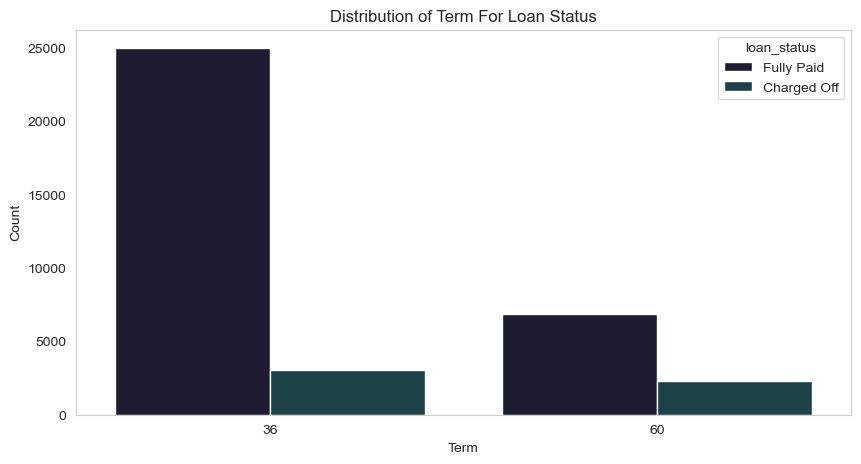

In [122]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

**Inference:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

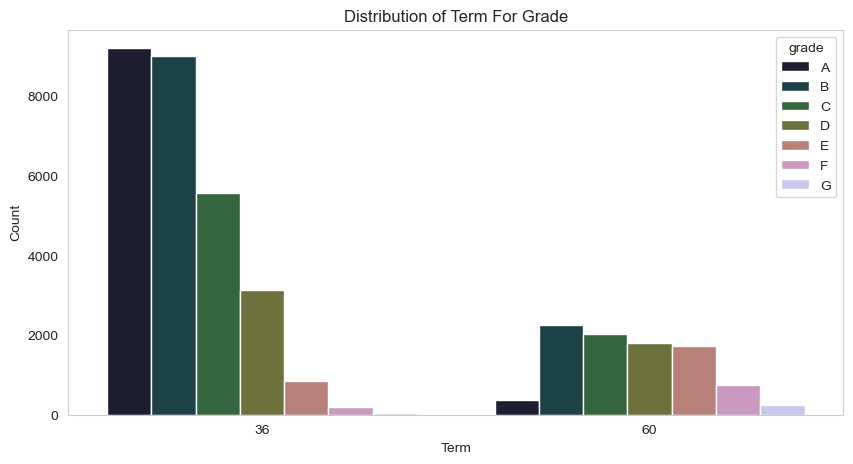

In [110]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

**Inference:** The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

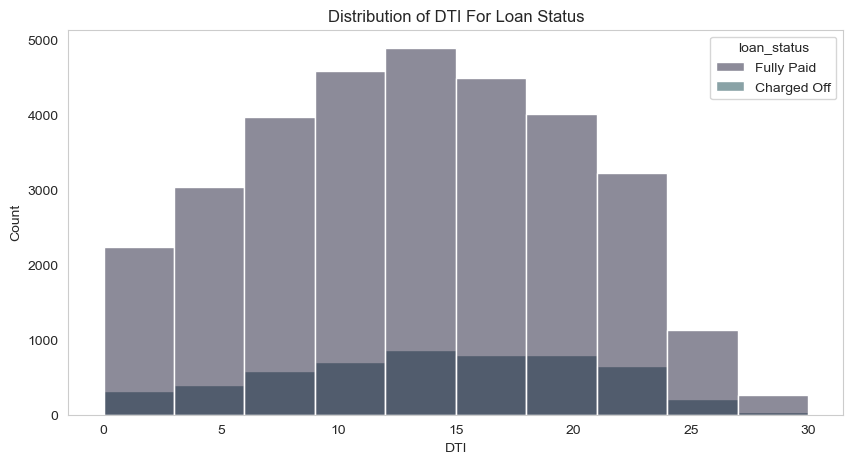

In [111]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

**Inference:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

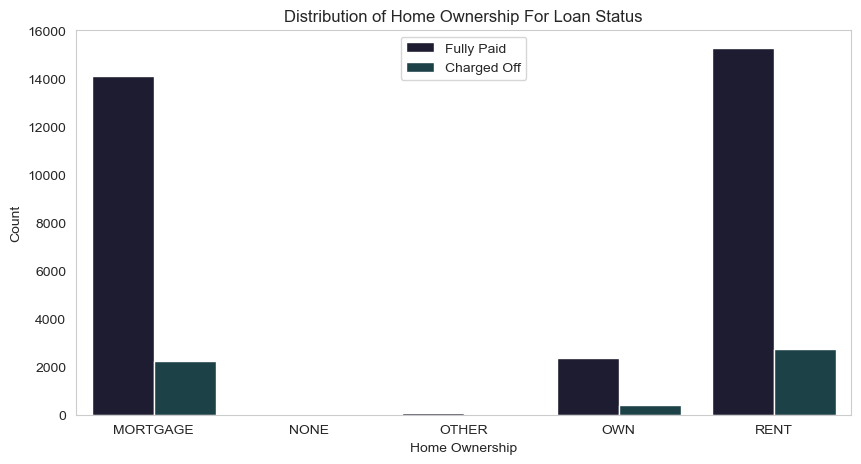

In [113]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

**Inference:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

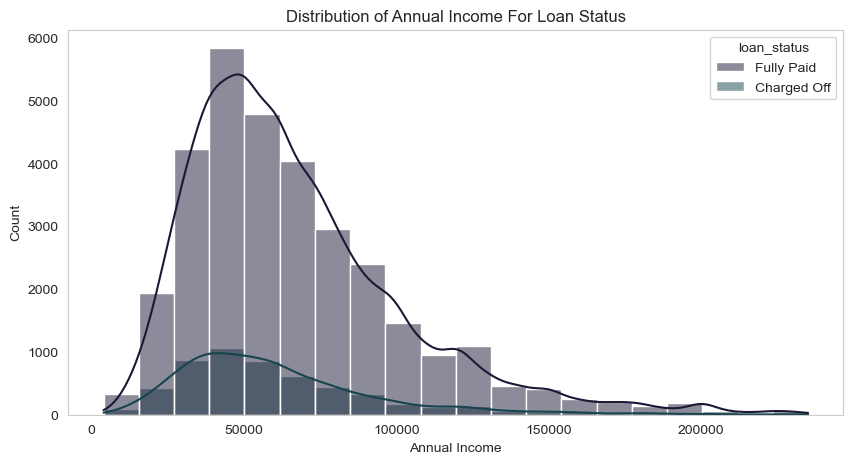

In [112]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

**Inference:** Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

In [ ]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

**Inference:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

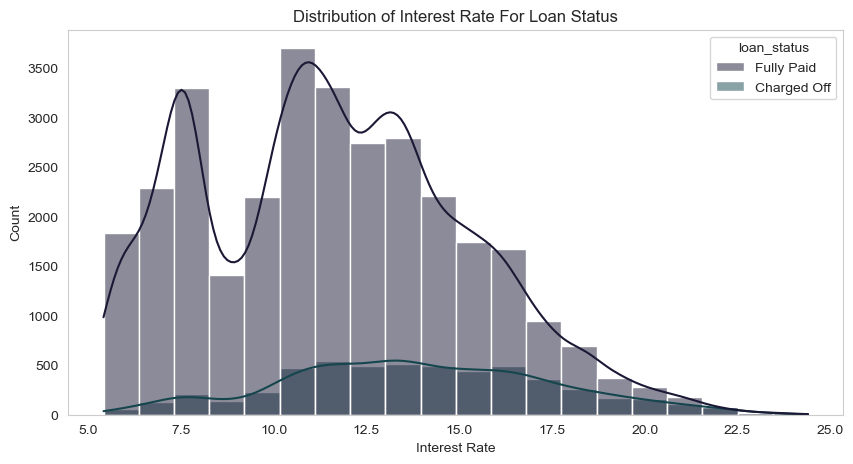

In [114]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

**Inference:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

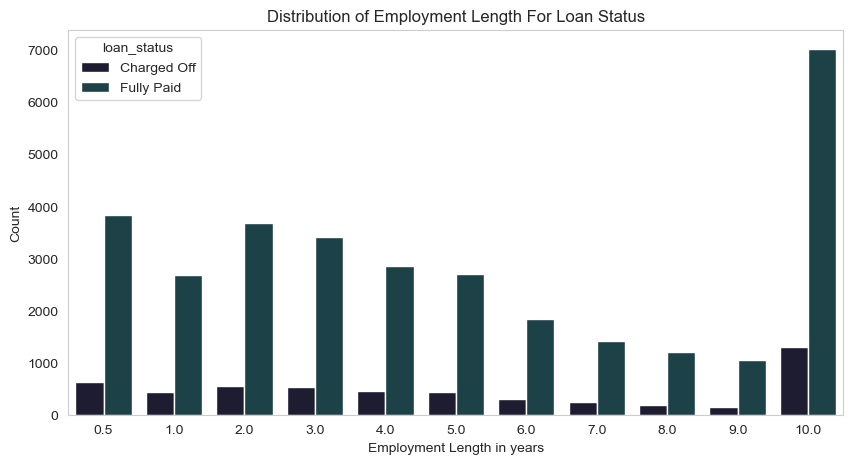

In [115]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

**Inference:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis

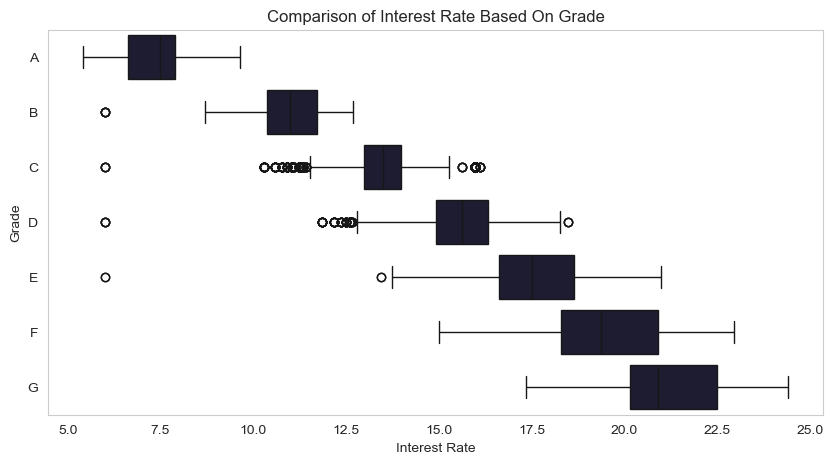

In [116]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Inference:** The Grade represent risk factor thus we can say interst rate increases with the risk.

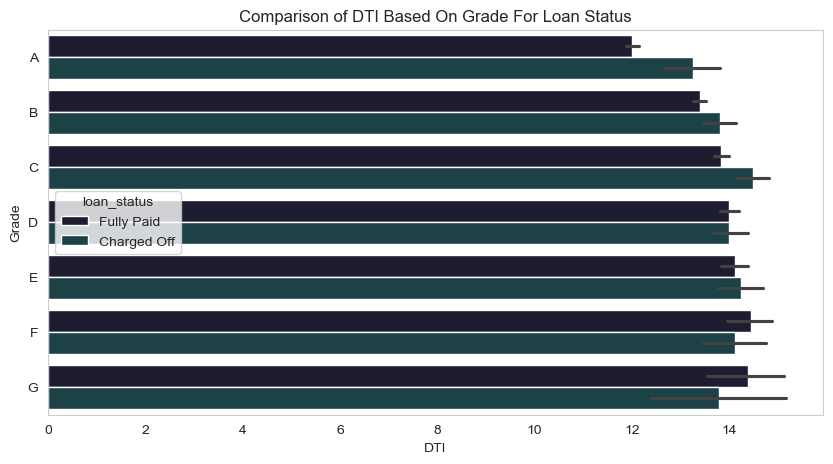

In [117]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

**Inference:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

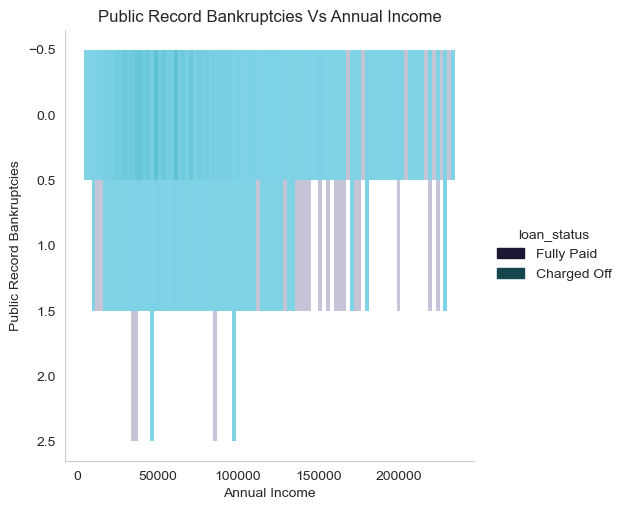

In [118]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()



**Inference:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

In [ ]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

Summary Statistics:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04    

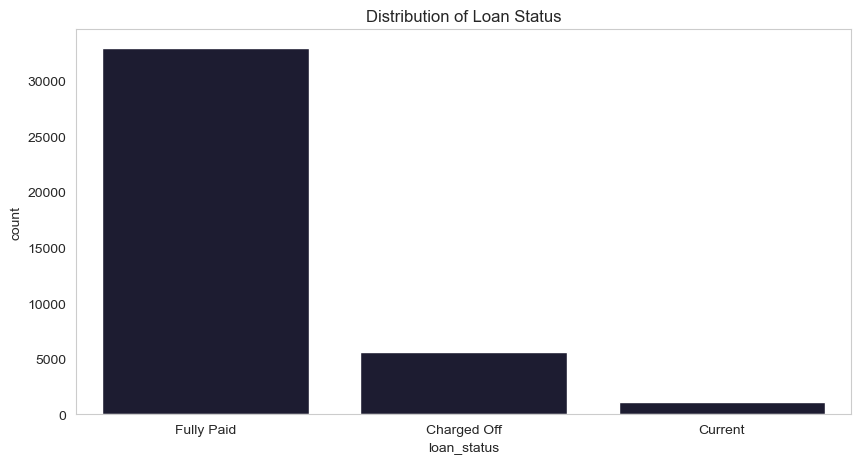

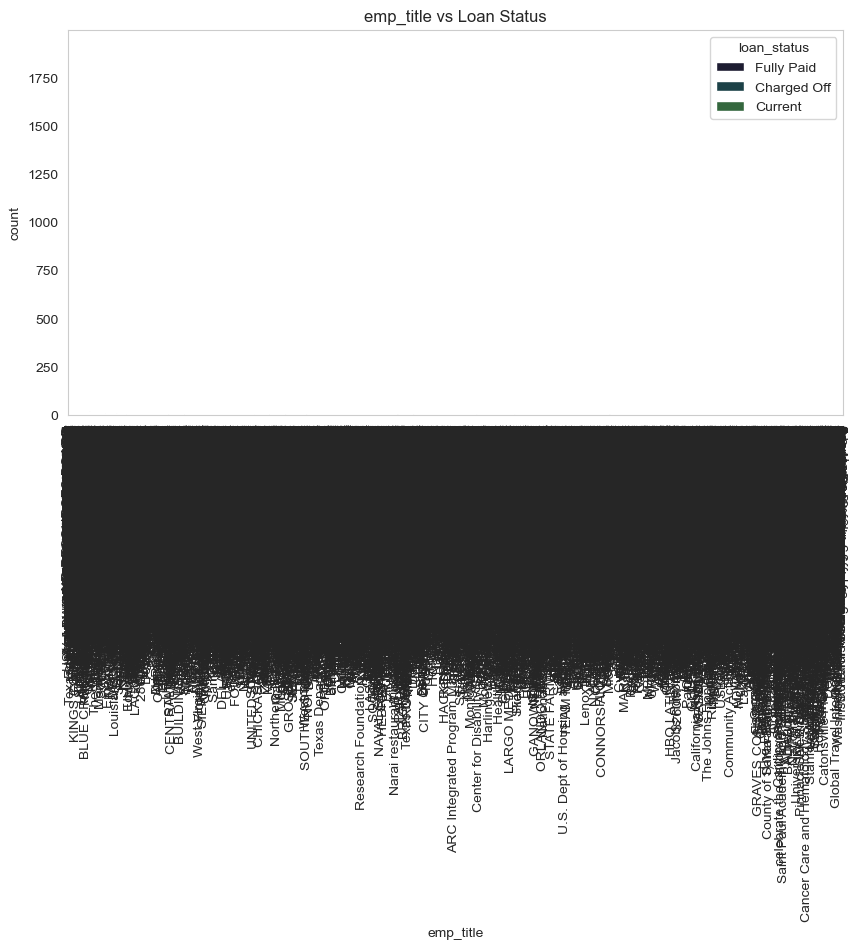

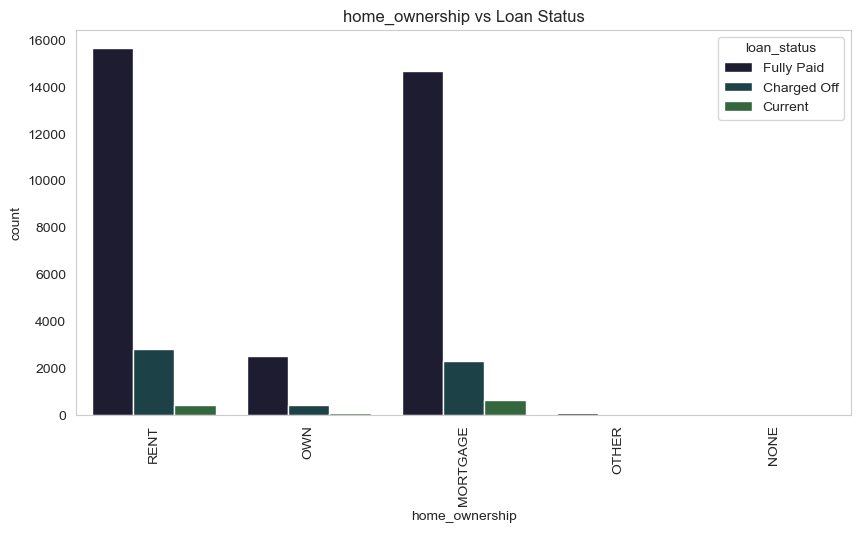

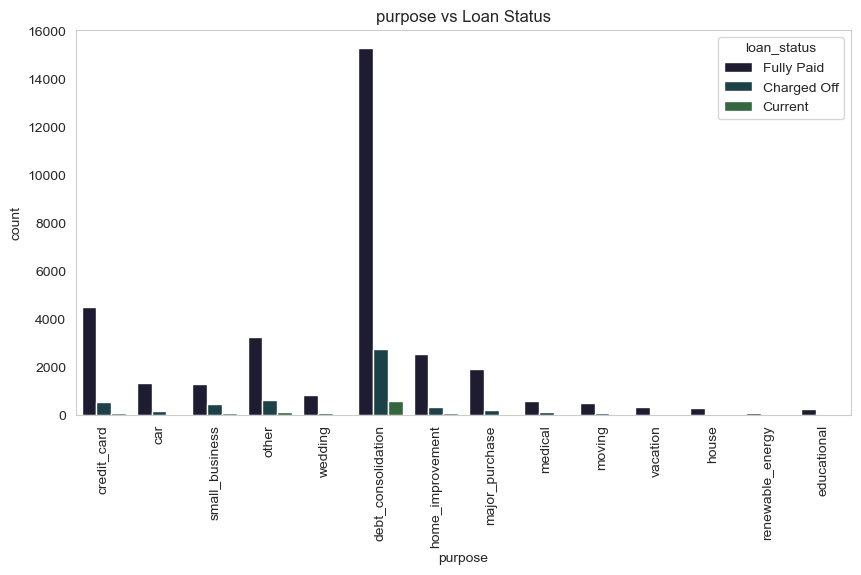

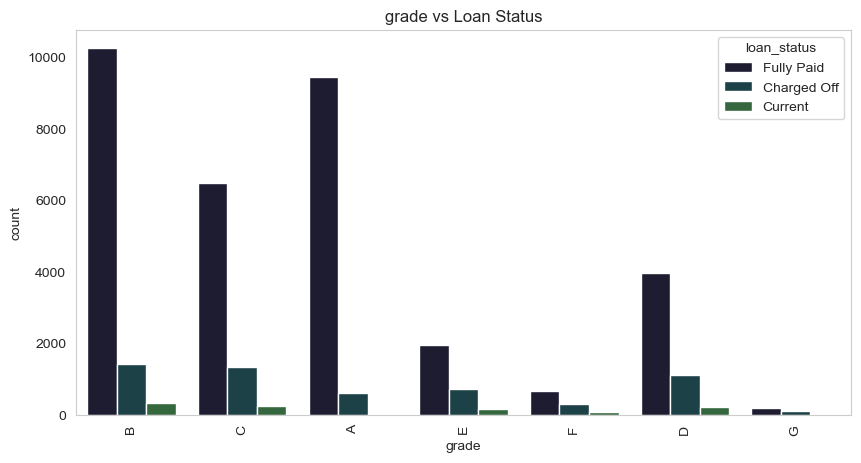

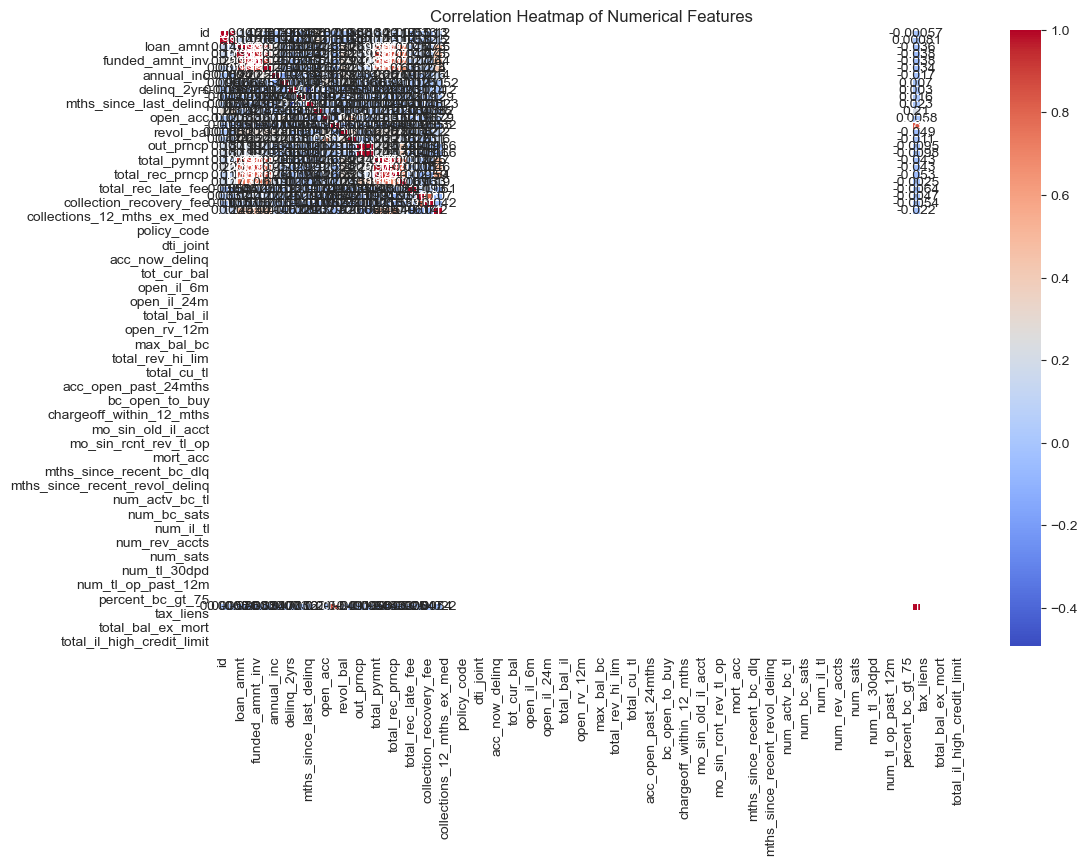

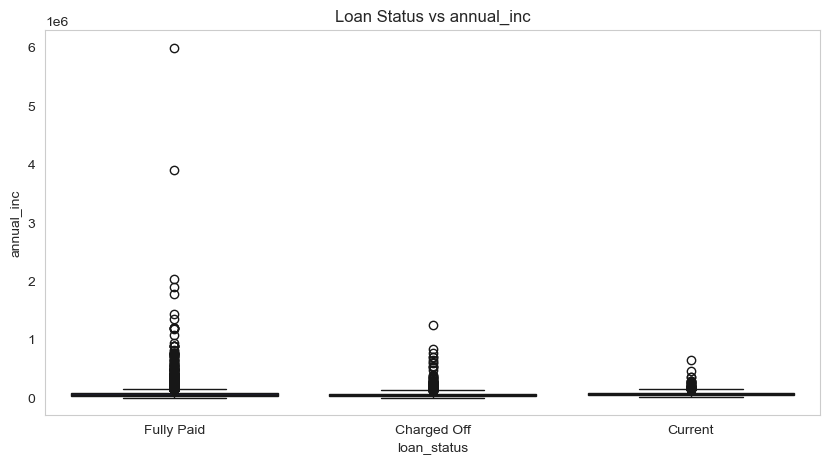

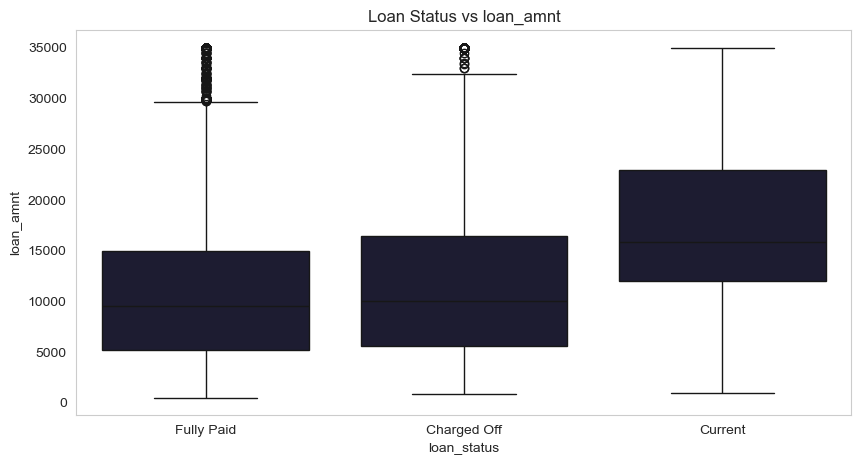

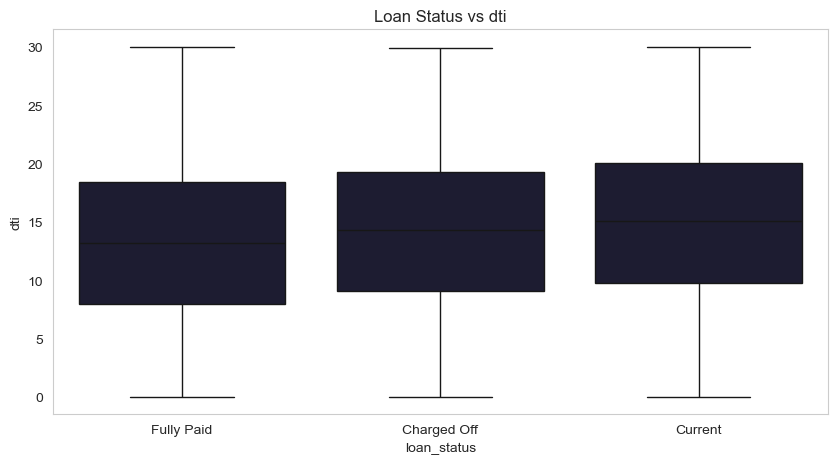

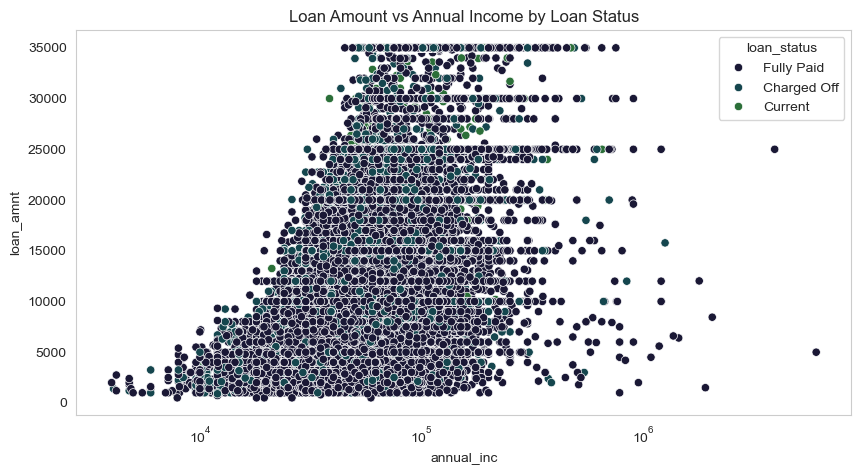

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data (adjust the file path accordingly)
file_path = 'loan.csv'
df = pd.read_csv(file_path)

# Handling missing values in `emp_title`
df['emp_title'].fillna('Unknown', inplace=True)

# 1. Summary Statistics
def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

# 2. Handle Missing Data (numerical: median, categorical: mode)
def handle_missing_data(df):
    df.fillna(df.median(numeric_only=True), inplace=True)
    for column in df.select_dtypes(include=['object']).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# 3. Analyze the target variable (Loan Status)
def loan_status_analysis(df):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='loan_status')
    plt.title("Distribution of Loan Status")
    plt.show()

# 4. Analyze default rates based on categorical variables
def analyze_default_rate(df, categorical_vars):
    for var in categorical_vars:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=var, hue='loan_status')
        plt.title(f'{var} vs Loan Status')
        plt.xticks(rotation=90)
        plt.show()

# 5. Correlation Heatmap (for numerical columns only)
def correlation_heatmap(df):
    # Filter only numerical columns
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()

# 6. Boxplots for detecting outliers in numerical columns
def boxplot_outliers(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df['loan_status'], y=df[column])
        plt.title(f'Loan Status vs {column}')
        plt.show()

# 7. Analyze loan amount and income relationships
def loan_amount_income_relationship(df):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=df)
    plt.title("Loan Amount vs Annual Income by Loan Status")
    plt.xscale('log')
    plt.show()

# Perform EDA
def perform_eda(df):
    summary_statistics(df)
    
    # Handle missing data
    df = handle_missing_data(df)
    
    # Analyze loan status distribution
    loan_status_analysis(df)
    
    # Analyze default rates based on categorical variables (adjust based on dataset)
    analyze_default_rate(df, ['emp_title', 'home_ownership', 'purpose', 'grade'])
    
    # Correlation heatmap for numerical columns
    correlation_heatmap(df)
    
    # Boxplot for detecting outliers in numerical columns
    boxplot_outliers(df, ['annual_inc', 'loan_amnt', 'dti'])
    
    # Analyze loan amount vs income relationships
    loan_amount_income_relationship(df)

# Run EDA
perform_eda(df)



## Insights

### Univariate Analysis
- Defaulted loans are significantly fewer, at one-seventh the volume of fully paid loans.
- Most loans have a 36-month term, making this option more common than the 60-month term.
- Interest rates are clustered around the 5-10% and 10-15% ranges, with a noticeable dip around 10%.
- A significant portion of loans are classified as grade 'A' or 'B', suggesting that many loans are of high quality.
- The majority of borrowers have over 10 years of work experience.
- Most borrowers do not own property outright; they are either renting or have a mortgage.
- About half of the borrowers have been verified or had their sources verified.
- Annual income follows a left-skewed distribution, indicating that most borrowers have lower incomes compared to the rest.
- A large proportion of loans are used for debt consolidation, followed by credit card purposes.
- The majority of borrowers are from large urban areas like California, New York, Texas, and Florida.
- Most borrowers have substantial debt relative to their income, particularly around a debt-to-income (DTI) ratio of 10-15.
- The majority of borrowers have no history of publicly recorded bankruptcy.
- Most loans are issued in the final quarter of the year.
- The number of approved loans has increased exponentially over time, indicating a rising loan approval rate.

### Segmented Univariate Analysis
- Debt consolidation is the leading reason for taking loans and has the highest number of both fully paid and defaulted loans.
- While the mean and lower quartile values are similar for both loan statuses, the upper quartile is higher for defaulted loans, suggesting that larger loans have higher risks of default.
- Loans with a 60-month term are more likely to default, while 36-month loans have a higher likelihood of being fully paid off.
- Loans with a 36-month term primarily consist of grade 'A' and 'B' loans, whereas loans with a 60-month term include more grade 'B', 'C', and 'D' loans.
- The likelihood of default changes with the debt-to-income (DTI) ratio: loans with a DTI of 10-15 show a higher number of defaults, and higher DTI values indicate an increased risk of default.
- Borrowers who own property outright have lower default rates compared to those with mortgages or renting.
- Borrowers with annual incomes below $50,000 are more prone to default, whereas higher-income borrowers are less likely to default.
- Fully paid loans are growing at a faster rate over time compared to defaulted loans.
- Defaulted loan amounts increase alongside the interest rate but decline after the rate surpasses 17.5%.
- Employees with over 10 years of work experience are likely to default but also have a high likelihood of fully repaying loans.

### Bivariate Analysis
- Loan grade reflects the risk level: interest rates increase with higher risk.
- Grade 'A' loans, considered the least risky, also have the lowest debt-to-income (DTI) ratios, indicating that higher grades correspond to a lower probability of default.
- Most borrowers have no history of publicly recorded bankruptcy, making them safer loan candidates.

### Recommendations
Key factors that can help predict the likelihood of default and reduce credit losses:
1. Debt-to-Income (DTI) ratio.
2. Loan grades.
3. Verification status.
4. Annual income.
5. Public record of bankruptcy.

Other considerations for identifying high-risk 'defaults':
1. Borrowers from areas other than large urban cities (e.g., California, New York, Texas, Florida).
2. Borrowers with annual incomes between $50,000 and $100,000.
3. Borrowers with a history of public-recorded bankruptcy.
4. Borrowers with lower loan grades (e.g., grades E, F, G), which represent higher risk.
5. Borrowers with very high debt-to-income (DTI) ratios.
6. Borrowers with 10+ years of work experience.




